# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [27]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

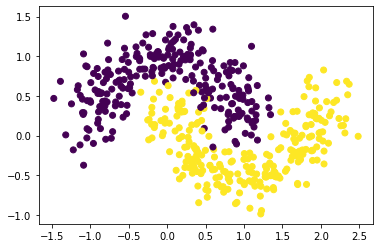

In [28]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

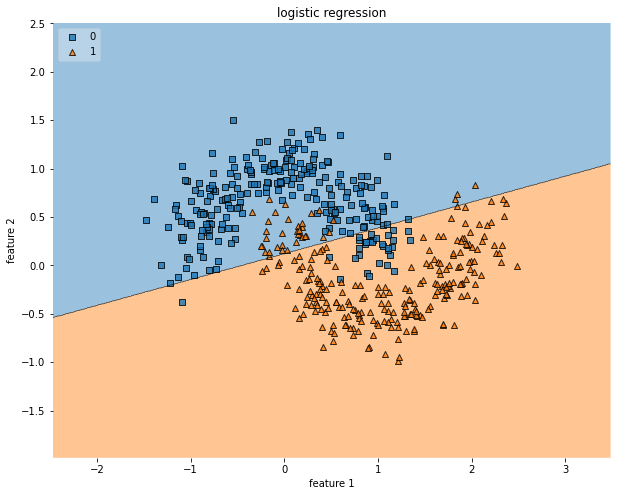

logistic regression score: 0.86


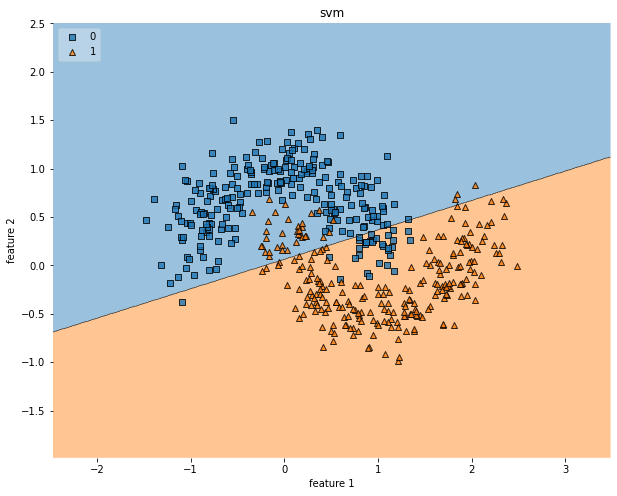

svm score: 0.862


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C=100, solver='lbfgs') # add some params
svm = SVC(kernel='linear', C = 100) # here too

### YOUR CODE HERE
def plot_decisions(dataset, labels, estimator, title, x_lable, y_lable):
    fig = plt.figure(figsize=(10, 8))
    plot_decision_regions(dataset, labels, estimator, legend=2)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.title(title)
    plt.show()
    
lr.fit(moons_points, moons_labels)
plot_decisions(moons_points, moons_labels, lr, "logistic regression", "feature 1", "feature 2")
print("logistic regression score:", lr.score(moons_points, moons_labels))

svm.fit(moons_points, moons_labels)
plot_decisions(moons_points, moons_labels, svm, "svm", "feature 1", "feature 2")
print("svm score:", svm.score(moons_points, moons_labels))

Picking up the parameters by hand, I found out that for small values of C, the score is less, and for large values (C > 10) it stabilizes at approximately the same values for both models. It is not surprising, given that the construction of an optimal straight line is not a very difficult task and even a simple algorithm can solve it very close to the optimum.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

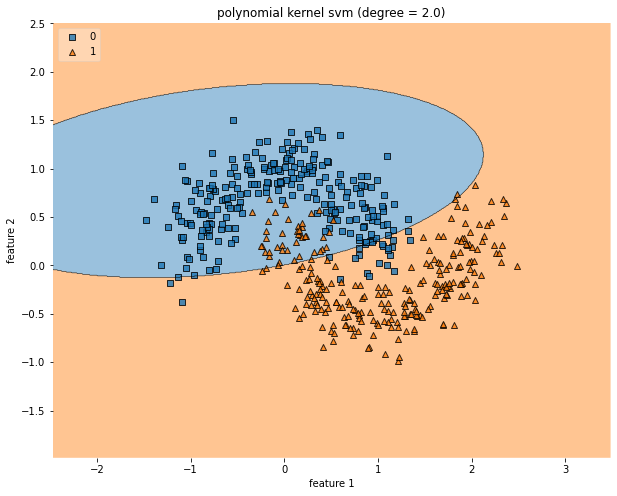

polynomial kernel svm (degree = 2.0) score: 0.868


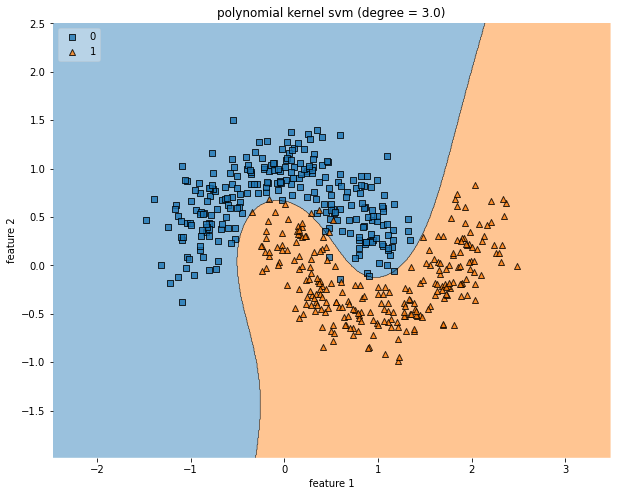

polynomial kernel svm (degree = 3.0) score: 0.986


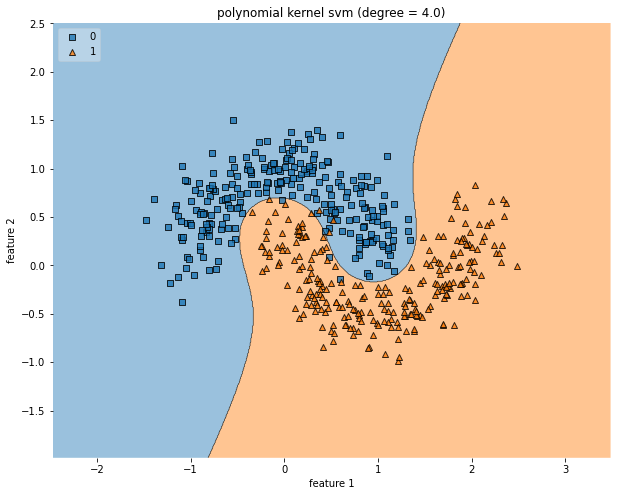

polynomial kernel svm (degree = 4.0) score: 0.988


In [95]:
### YOUR CODE HERE
max_score = 0
max_svm = (0, 0)
for degree in np.linspace(2, 4, 3):
    for C in np.linspace(0.1, 10, 10):
        for coef0 in np.linspace(2, 50, 25):
                svm_poly = SVC(C=C, kernel='poly', coef0=coef0, degree=degree)
                svm_poly.fit(moons_points, moons_labels)
                if max_score < svm_poly.score(moons_points, moons_labels):
                    max_score = svm_poly.score(moons_points, moons_labels)
                    max_svm = svm_poly
    plot_decisions(moons_points, moons_labels, max_svm, "polynomial kernel svm (degree = " + str(degree) + ")", "feature 1", "feature 2")
    print("polynomial kernel svm (degree = " + str(degree) + ") score:", max_score)
    max_score = 0
    max_svm = (0, 0)

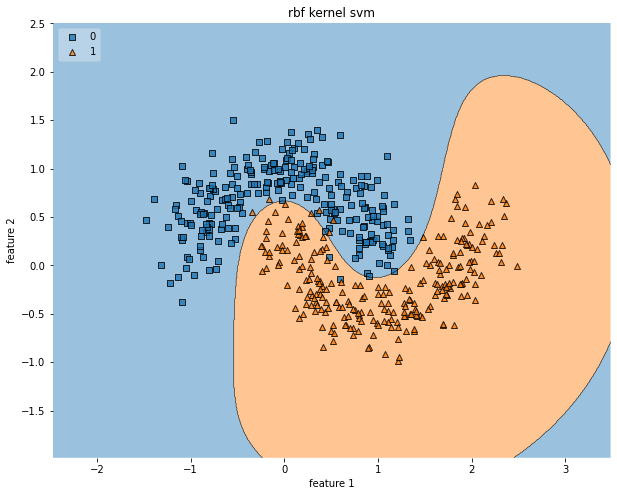

rbf kernel svm score: 0.984


In [71]:
max_score = 0
max_svm = (0, 0)
for C in np.linspace(0.1, 20, 50):
    svm_rbf = SVC(C=C, kernel='rbf')
    svm_rbf.fit(moons_points, moons_labels)
    if max_score < svm_rbf.score(moons_points, moons_labels):
        max_score = svm_rbf.score(moons_points, moons_labels)
        max_svm = svm_rbf
plot_decisions(moons_points, moons_labels, max_svm, "rbf kernel svm", "feature 1", "feature 2")
print("rbf kernel svm score:", max_score)

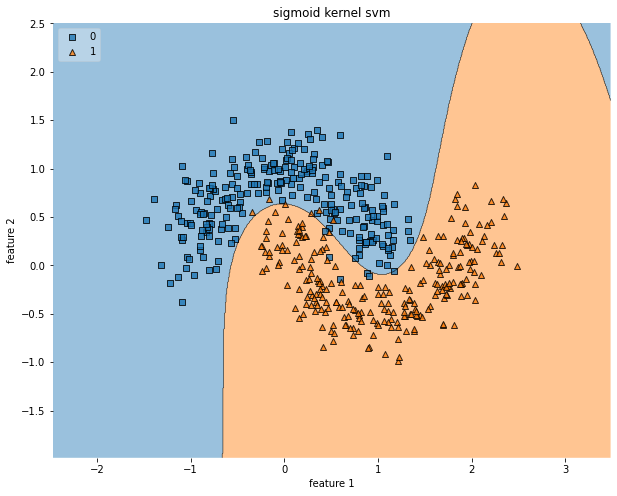

sigmoid kernel svm score: 0.98


In [79]:
max_score = 0
max_svm = (0, 0)
for C in np.linspace(20, 1000, 50):
    for coef0 in  np.linspace(-10, 10, 21):
        svm_sigmoid = SVC(C=C, kernel='sigmoid', coef0=coef0)
        svm_sigmoid.fit(moons_points, moons_labels)
        if max_score < svm_sigmoid.score(moons_points, moons_labels):
            max_score = svm_sigmoid.score(moons_points, moons_labels)
            max_svm = svm_sigmoid
plot_decisions(moons_points, moons_labels, max_svm, "sigmoid kernel svm", "feature 1", "feature 2")
print("sigmoid kernel svm score:", max_score)

* What have happenned with classification quality?

The quality of the classification has increased significantly. However, it was very difficult and long to find good parameters for the sigmoid kernel.

* How did decision border changed for each kernel?

All borders have become nonlinear and resemble the outlines of a cubic function at the place of class division. What to expect.

* What `degree` have you chosen and why?

I have chosen the 3rd degree because the natural border between classes is very similar to a cubic function. For 2nd degree, the model is obviously underfit. For degrees above 3rd, there is a risk of overfitting with a small gain in score

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

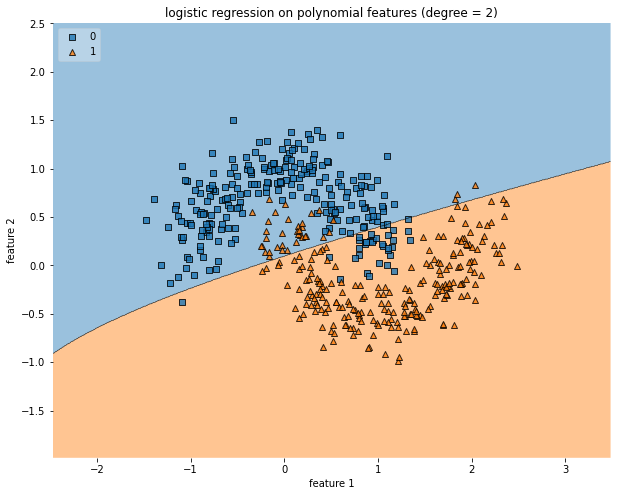

logistic regression on polynomial features (degree = 2) score: 0.86


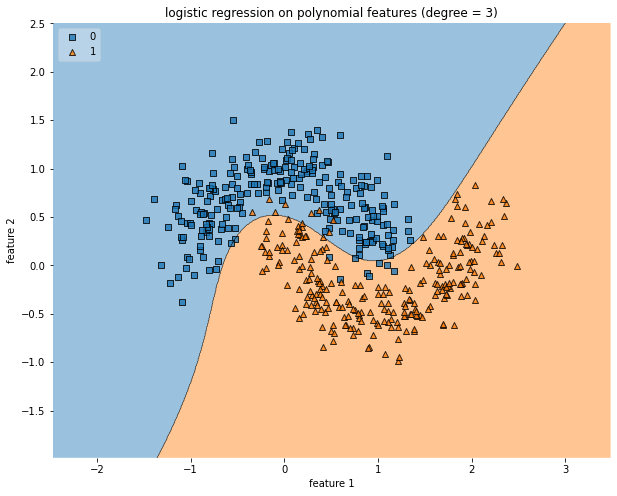

logistic regression on polynomial features (degree = 3) score: 0.968


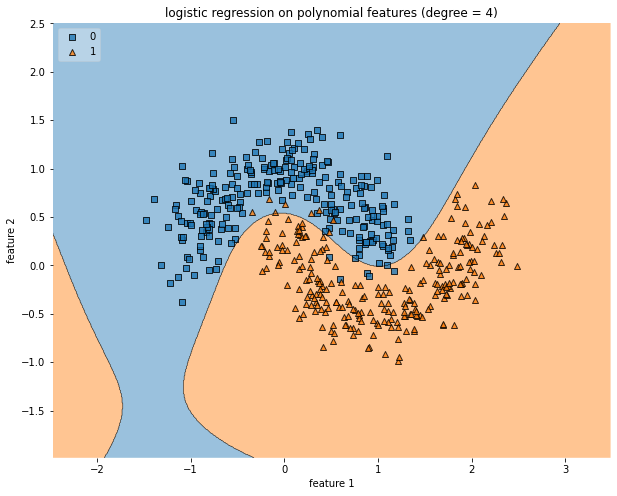

logistic regression on polynomial features (degree = 4) score: 0.97


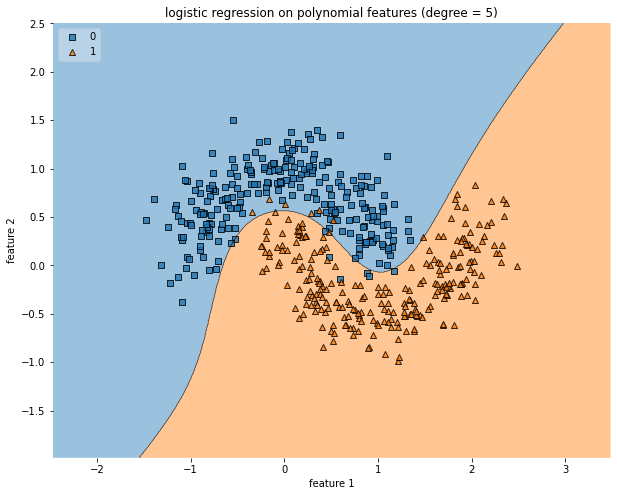

logistic regression on polynomial features (degree = 5) score: 0.972


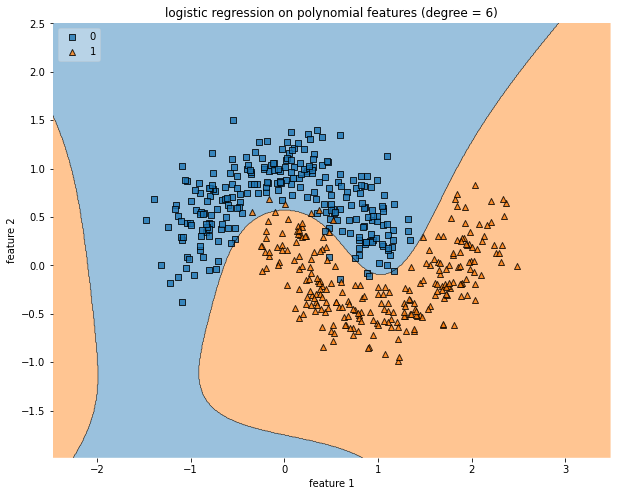

logistic regression on polynomial features (degree = 6) score: 0.976


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

### YOUR CODE HERE
for degree in [2, 3, 4, 5, 6]:
    poly_features_lr = make_pipeline(PolynomialFeatures(degree=degree), LogisticRegression(solver='lbfgs'))
    poly_features_lr.fit(moons_points, moons_labels)
    plot_decisions(moons_points, moons_labels, poly_features_lr, "logistic regression on polynomial features (degree = " + str(degree) + ")", "feature 1", "feature 2")
    print("logistic regression on polynomial features (degree = " + str(degree) + ") score:", poly_features_lr.score(moons_points, moons_labels))

* Comare SVM's results with this solution (quality, borders type)

The time of writing the code is comparable to polynomial kernel svm, while it is slightly worse in quality (as in comparison with the other two kernels, but I spent much more time on them). Borders also turned out to be a little stranger and less obvious in comparison with polynomial svm.

At the same time, the execution of the program took much less time. As I understand, this is the main benefit of logistic regression on polynomial features.

* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

As in the case of polynomial kernel svm, the optimal degree is the 3d for the same reasons.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

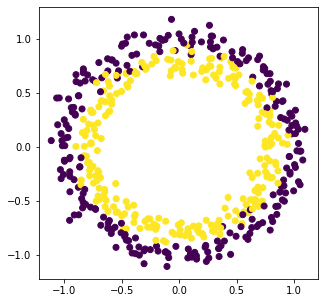

In [6]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

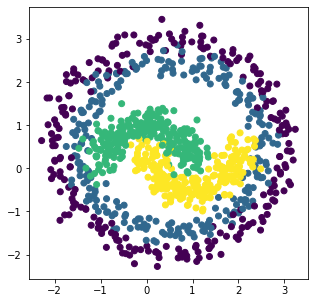

In [7]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

C:\Study\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


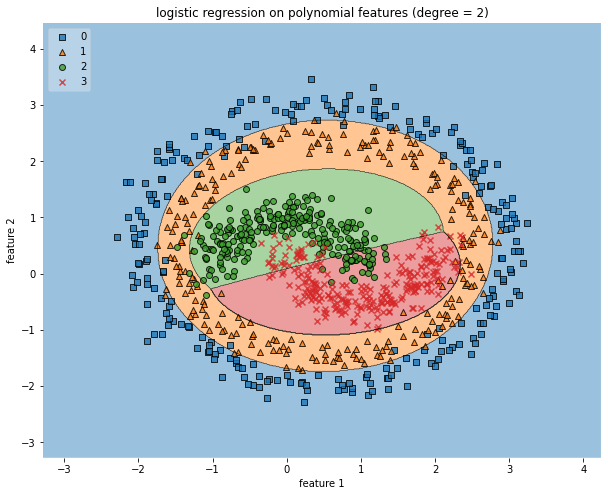

logistic regression on polynomial features (degree = 2) score: 0.879


C:\Study\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


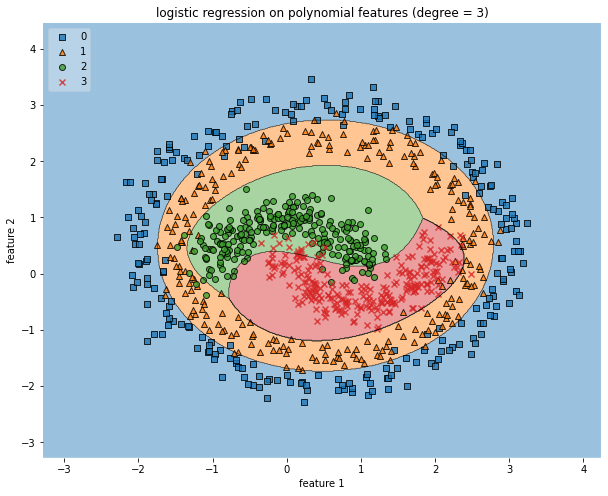

logistic regression on polynomial features (degree = 3) score: 0.921


C:\Study\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


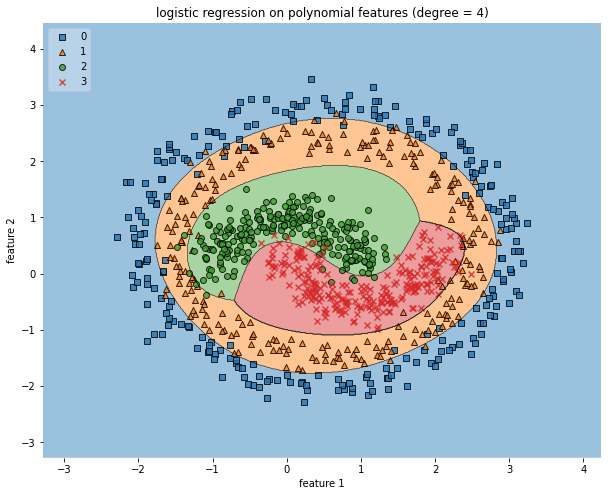

logistic regression on polynomial features (degree = 4) score: 0.942


C:\Study\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


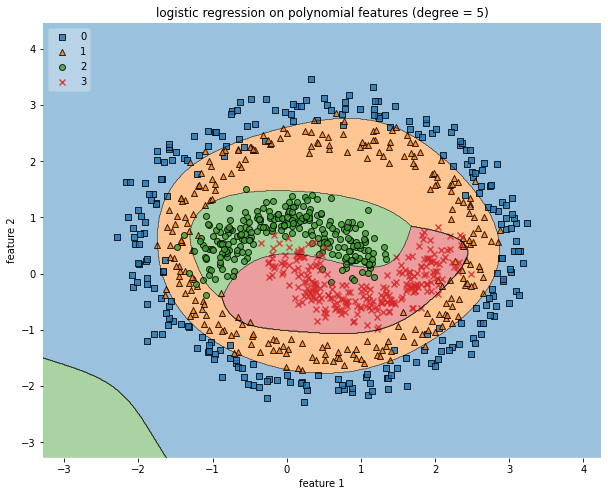

logistic regression on polynomial features (degree = 5) score: 0.919


C:\Study\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


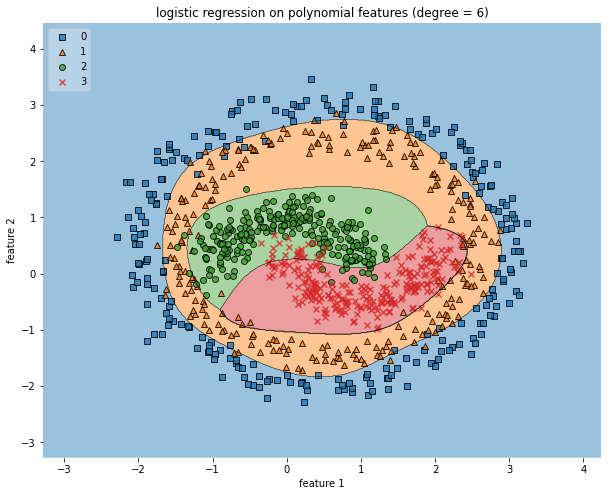

logistic regression on polynomial features (degree = 6) score: 0.91


In [92]:
### YOUR CODE HERE
for degree in [2, 3, 4, 5, 6]:
    poly_features_lr = make_pipeline(PolynomialFeatures(degree=degree), LogisticRegression(solver='lbfgs'))
    poly_features_lr.fit(points, labels)
    plot_decisions(points, labels, poly_features_lr, "logistic regression on polynomial features (degree = " + str(degree) + ")", "feature 1", "feature 2")
    print("logistic regression on polynomial features (degree = " + str(degree) + ") score:", poly_features_lr.score(points, labels))

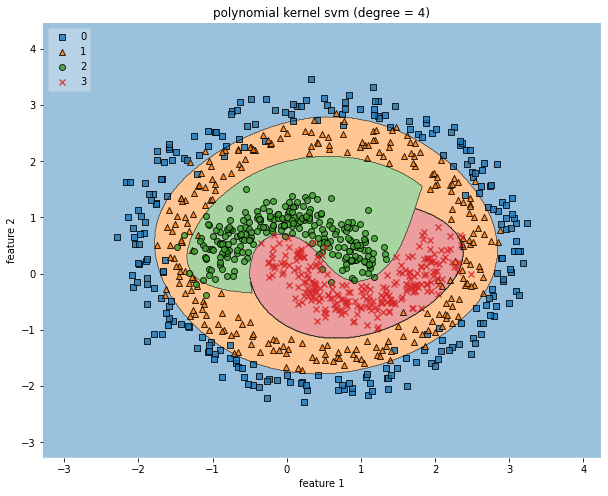

polynomial kernel svm (degree = 4) score: 0.951


In [94]:
max_score = 0
max_svm = (0, 0)
for C in np.linspace(0.1, 10, 10):
    for coef0 in np.linspace(2, 50, 25):
            svm_poly = SVC(C=C, kernel='poly', coef0=coef0, degree=4)
            svm_poly.fit(points, labels)
            if max_score < svm_poly.score(points, labels):
                max_score = svm_poly.score(points, labels)
                max_svm = svm_poly
plot_decisions(points, labels, max_svm, "polynomial kernel svm (degree = 4)", "feature 1", "feature 2")
print("polynomial kernel svm (degree = 4) score:", max_score)

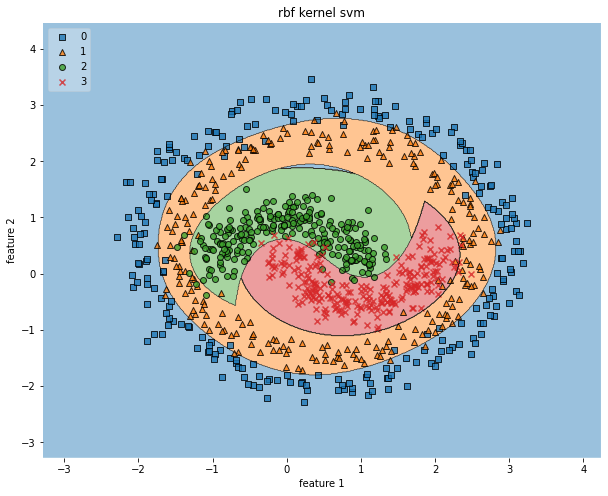

rbf kernel svm score: 0.941


In [96]:
max_score = 0
max_svm = (0, 0)
for C in np.linspace(0.1, 20, 50):
    svm_rbf = SVC(C=C, kernel='rbf')
    svm_rbf.fit(points, labels)
    if max_score < svm_rbf.score(points, labels):
        max_score = svm_rbf.score(points, labels)
        max_svm = svm_rbf
plot_decisions(points, labels, max_svm, "rbf kernel svm", "feature 1", "feature 2")
print("rbf kernel svm score:", max_score)

First we found the optimal degree of the polynomial using logistic regression on polynomial features. It is easy to see that the peak falls on the 4th degree with a score 0.942

Polynomial kernel svm with this degree gave a slightly better score 0.951, but if you look at the graph, then the suspicion creeps in that the model is a little overfitted. But I'm not sure.

Rbf kernel svm gave a score 0.941